In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import accuracy_score
from sklearn import tree

Reading Data

In [4]:
df=pd.read_csv('diabetes.csv')
df.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

checking null values in the dataset

In [5]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
df.describe()
#scaling is needed

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  0.078000   21.000000    0.000000  
25%     27.300000                  0.243750   24.000000    0.000000  
50%     32.000000                  0.372500   29.000000    0.000000  
75%     36.600000                  0.626250   41.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000

In [8]:
df.duplicated().sum() # zero duplicates
df.sample(5)

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
511            0      139             62             17      210  22.1   
89             1      107             68             19        0  26.5   
6              3       78             50             32       88  31.0   
489            8      194             80              0        0  26.1   
296            2      146             70             38      360  28.0   

     DiabetesPedigreeFunction  Age  Outcome  
511                     0.207   21        0  
89                      0.165   24        0  
6                       0.248   26        1  
489                     0.551   67        0  
296                     0.337   29        1

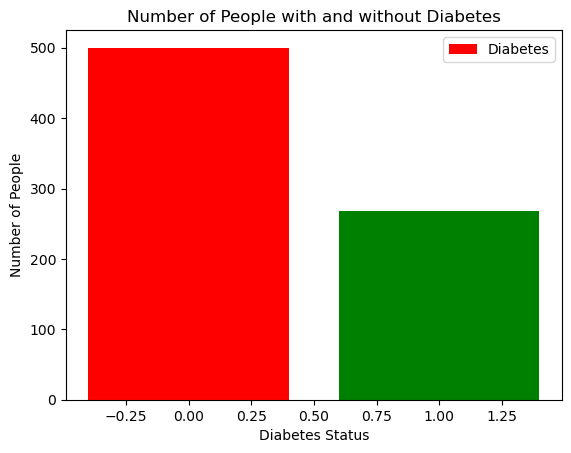

In [22]:
diabetes_counts = df['Outcome'].value_counts()

plt.bar(diabetes_counts.index, diabetes_counts.values, color=['red', 'green'])

plt.xlabel('Diabetes Status')
plt.ylabel('Number of People')
plt.title('Number of People with and without Diabetes')

plt.legend(['Diabetes', 'No Diabetes'])

# Show the plot
plt.show()

In [9]:
x = df.drop('Outcome',axis = 1)
y = df['Outcome']

In [10]:
x_train, x_test, y_train, y_test = train_test_split(x,y ,test_size = .2, random_state = 0)

In [11]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(solver = 'liblinear')

In [12]:
logreg.fit(x_train,y_train)


LogisticRegression(solver='liblinear')

In [13]:
from sklearn.metrics import confusion_matrix
logreg.score(x_test,y_test)

0.8181818181818182

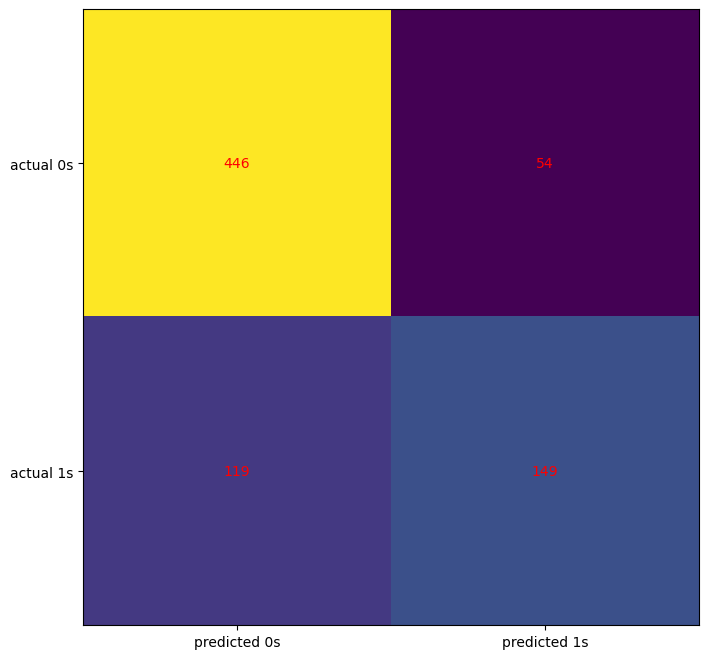

In [14]:
cm = confusion_matrix(y,logreg.predict(x))

fig ,ax = plt.subplots(figsize = (8,8))
ax.imshow(cm)
ax.xaxis.set(ticks = (0,1),ticklabels = ('predicted 0s','predicted 1s'))
ax.yaxis.set(ticks = (0,1),ticklabels = ('actual 0s','actual 1s'))
ax.set_ylim(1.5,-0.5)
for i in range(2):
    for j in range(2):
        ax.text(j,i ,cm[i,j], ha = 'center', va = 'center', color = 'red')
plt.show()

In [15]:
import joblib

joblib.dump(logreg,'diabetes_doctor.pkl')

['diabetes_doctor.pkl']

In [16]:
model=joblib.load("diabetes_doctor.pkl")

In [17]:
model.predict(x_test)

array([1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
      dtype=int64)

In [18]:
x_train.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')

In [19]:
x_train

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
603            7      150             78             29      126  35.2   
118            4       97             60             23        0  28.2   
247            0      165             90             33      680  52.3   
157            1      109             56             21      135  25.2   
468            8      120              0              0        0  30.0   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
192            7      159             66              0        0  30.4   
629            4       94             65             22        0  24.7   
559           11       85             74              0        0  30.1   
684            5      136             82              0        0   0.0   

     DiabetesPedigreeFunction  Age  
603                     0.692   54  
118                     0.443   22  
247                     0.427   23  
157                     0.833   23  
468                     0.183   38  
..                        ...  ...  
763                     0.171   63  
192                     0.383   36  
629                     0.148   21  
559                     0.300   35  
684                     0.640   69  

[614 rows x 8 columns]

In [21]:
x_train['SkinThickness'].mean()

20.623778501628664

1-Pregnancies:

This represents the number of times a person has been pregnant. It is a discrete variable.

2-Glucose:

This is the plasma glucose concentration measured in milligrams per deciliter (mg/dL). Glucose levels are often used to diagnose and monitor diabetes.

3-BloodPressure:

This is the diastolic blood pressure (the pressure in the arteries when the heart is at rest) measured in millimeters of mercury (mm Hg). High blood pressure is a risk factor for diabetes

4-SkinThickness:

This is the thickness of the skinfold at the triceps, measured in millimeters. While skin thickness itself may not directly indicate diabetes, it could be related to body fat, which is a diabetes risk factor.

5-Insulin:

This represents the insulin level in the blood measured in milligrams per deciliter (mg/dL). Insulin is a hormone that helps regulate blood sugar levels.

6-BMI (Body Mass Index):

BMI is a measure of body fat based on height and weight. It is calculated by dividing a person's weight in kilograms by the square of their height in meters. Higher BMI values are associated with an increased risk of diabetes.

7-DiabetesPedigreeFunction:

This is a function that scores the likelihood of diabetes based on family history. It provides information about the genetic predisposition of an individual to diabetes.

8-Age:

This represents the age of the individual in years. Age is a significant factor in diabetes risk, as the likelihood of developing diabetes generally increases with age.